In [1]:
#imports del notebook anterior
import re
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import csv
import requests

#imports para graficar
import matplotlib.pyplot as plt
import seaborn as sns

#importando librería propia
import sys
sys.path.append('./../')

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

#Own Library modules
import src
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.algorithms import eda as eda_eq

In [2]:
# para leer el archivo como local
agua = pd.read_csv('../data/consumo-agua.csv')

# para leer el archivo de la liga
#CSV_URL = 'https://datos.cdmx.gob.mx/explore/dataset/consumo-agua/download/?format=csv&timezone=America/Mexico_City&lang=es&use_labels_for_header=true&csv_separator=%2C'
#agua_liga = pd.read_csv(CSV_URL)

* Una grafica de correlaciones
* histogramas (poniendo distribucion)
* análisis plot por delegación
* graficar los 3 tipos de consumo (suma y/o conteo)
* imprimir cantidad de datos faltantes
* buscar diferencias en variables con respecto a indice_des --Scatterplots


- ¿Se consume la misma cantidad de agua en cada uno de los indices?
- La localidad / colonia/ delegación afecta en el consumo?
- los datos estaban... en que temporalidad? bimestral --> data más espaciada? --> cambios entre bimestres?




In [3]:
agua = eda_eq.prepara_dataset(agua)

In [4]:
agua.head()

,geo_shape,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",159.72,2019,gustavo a. madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",0.00,2019,gustavo a. madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",0.00,2019,gustavo a. madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",0.00,2019,gustavo a. madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",56.72,2019,azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


In [5]:
# analizando correlaciones
corr = agua.corr()
corr

,consumo_total_mixto,anio,consumo_prom_dom,consumo_total_dom,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,consumo_total_no_dom,latitud,longitud
consumo_total_mixto,1.000000,NaN,0.042414,0.095245,0.747912,0.179980,-0.015296,-0.029513,0.024932,0.158316,-0.090781
anio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consumo_prom_dom,0.042414,NaN,1.000000,0.039057,0.034427,0.086303,0.082282,0.106284,0.095580,0.038515,-0.084826
consumo_total_dom,0.095245,NaN,0.039057,1.000000,0.059390,0.829515,-0.024583,-0.008457,0.067818,0.065557,-0.133556
consumo_prom_mixto,0.747912,NaN,0.034427,0.059390,1.000000,0.155880,0.002969,-0.008359,0.074109,0.083842,-0.094724
consumo_total,0.179980,NaN,0.086303,0.829515,0.155880,1.000000,0.399393,0.428152,0.640387,0.083843,-0.160327
consumo_prom,-0.015296,NaN,0.082282,-0.024583,0.002969,0.399393,1.000000,0.984467,0.705045,0.005914,-0.026862
consumo_prom_no_dom,-0.029513,NaN,0.106284,-0.008457,-0.008359,0.428152,0.984467,1.000000,0.737402,0.000485,-0.039022
consumo_total_no_dom,0.024932,NaN,0.095580,0.067818,0.074109,0.640387,0.705045,0.737402,1.000000,0.024435,-0.086867
latitud,0.158316,NaN,0.038515,0.065557,0.083842,0.083843,0.005914,0.000485,0.024435,1.000000,-0.174334


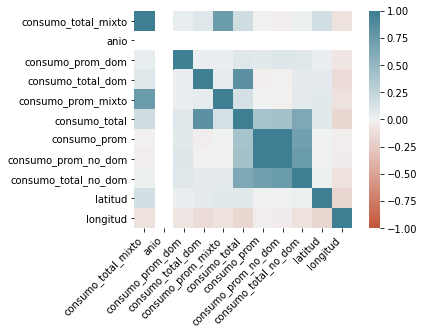

In [6]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

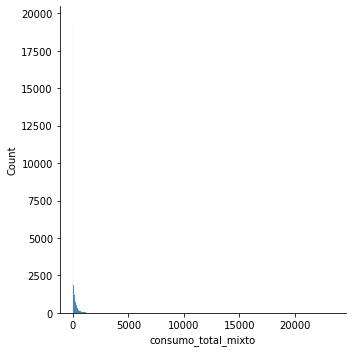

In [7]:
sns.displot(agua, x="consumo_total_mixto")

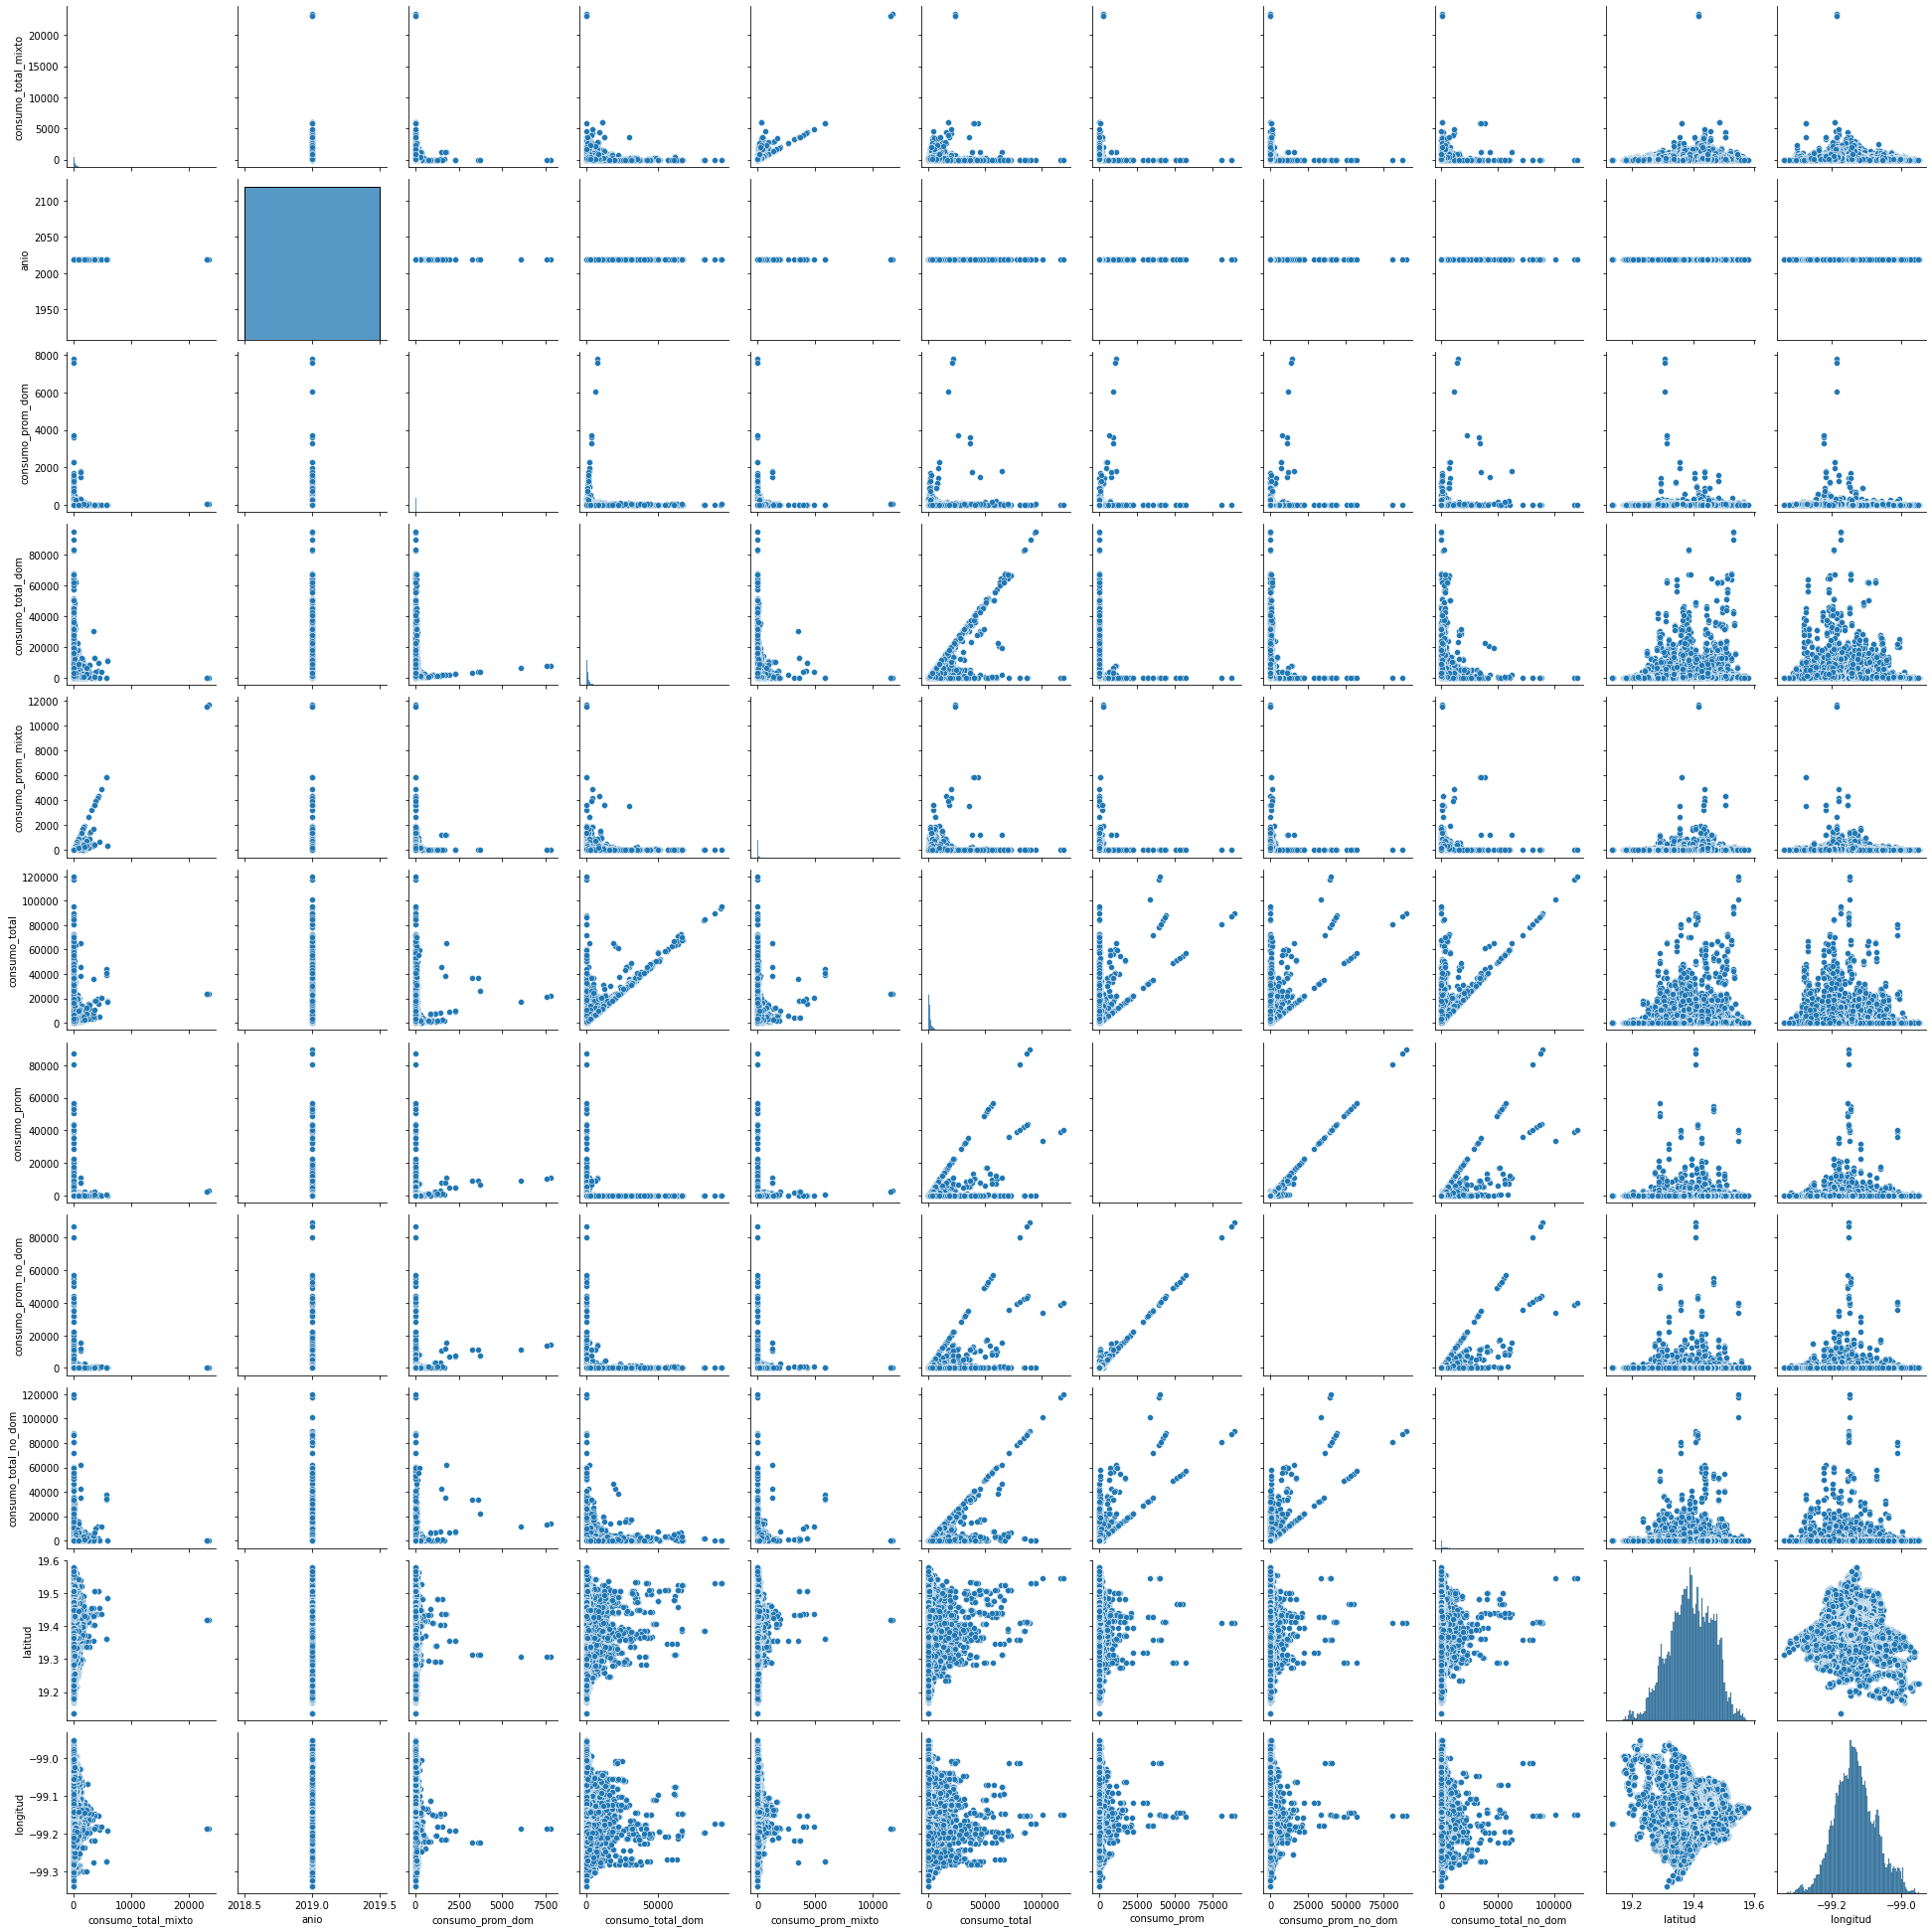

In [8]:
sns.pairplot(agua)

In [9]:
agua.dtypes

geo_shape                 object
consumo_total_mixto      float64
anio                       int64
nomgeo                  category
consumo_prom_dom         float64
consumo_total_dom        float64
alcaldia                category
colonia                 category
consumo_prom_mixto       float64
consumo_total            float64
consumo_prom             float64
consumo_prom_no_dom      float64
bimestre                category
consumo_total_no_dom     float64
gid                     category
indice_des              category
latitud                  float64
longitud                 float64
dtype: object

## Variable consumo total mixto

In [10]:
agua['consumo_total_mixto'].max()

23404.44

In [11]:
agua['consumo_total_mixto'].min()

0.0

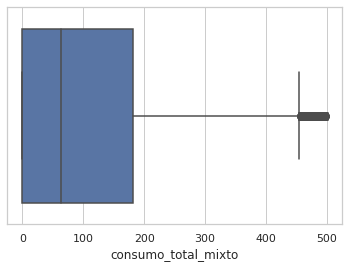

In [12]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=agua.loc[agua["consumo_total_mixto"] < 500]["consumo_total_mixto"])

In [13]:
agua.sort_values('consumo_total_mixto', ascending = False).head(20)

,geo_shape,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
42044,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",23404.44,2019,miguel hidalgo,31.500000,94.50,miguel hidalgo,bosque de chapultepec i seccion,11702.220000,23689.87,2632.207778,47.732500,2,190.93,28345,popular,19.418136,-99.186619
55180,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",23058.90,2019,miguel hidalgo,30.473333,91.42,miguel hidalgo,bosque de chapultepec i seccion,11529.449707,23345.60,2593.956601,48.822498,1,195.29,4771,popular,19.418136,-99.186619
38711,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",23031.06,2019,miguel hidalgo,31.703333,95.11,miguel hidalgo,bosque de chapultepec i seccion,11515.530000,23312.54,2590.282222,46.592500,3,186.37,52254,popular,19.418136,-99.186619
30594,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",5979.71,2019,azcapotzalco,22.322757,11094.41,azcapotzalco,pueblo santo domingo,373.731875,17411.45,33.677853,84.332500,3,337.33,57637,popular,19.485518,-99.191293
13328,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",5974.32,2019,azcapotzalco,22.557258,11188.40,azcapotzalco,pueblo santo domingo,373.395003,17680.20,34.263857,129.357498,1,517.43,10032,popular,19.485518,-99.191293
27277,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",5966.71,2019,azcapotzalco,22.280524,11051.14,azcapotzalco,pueblo santo domingo,372.919375,17355.79,33.635252,84.485000,2,337.94,33745,popular,19.485518,-99.191293
31239,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",5808.00,2019,cuajimalpa de morelos,0.000000,0.00,cuajimalpa,santa fe cuajimalpa,5808.000000,39582.64,341.229655,293.692522,3,33774.64,59566,alto,19.361647,-99.273469
50945,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",5808.00,2019,cuajimalpa de morelos,NaN,NaN,cuajimalpa,santa fe cuajimalpa,5808.000000,40517.00,295.744381,255.213089,1,34709.00,11924,alto,19.361647,-99.273469
44440,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",5808.00,2019,cuajimalpa de morelos,0.000000,0.00,cuajimalpa,santa fe cuajimalpa,5808.000000,43780.66,374.193675,327.350517,2,37972.66,35680,alto,19.361647,-99.273469
42103,"{""type"": ""multipolygon"", ""coordinates"": [[[[-9...",4919.04,2019,miguel hidalgo,22.990000,3977.27,miguel hidalgo,anahuac i seccion,4919.040000,20437.72,110.474162,1049.219091,2,11541.41,28506,medio,19.438179,-99.181145


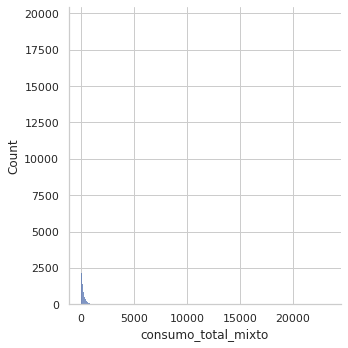

In [14]:
sns.displot(agua, x="consumo_total_mixto")